In [1]:
# !pip install --upgrade pandas
# !pip install openpyxl --upgrade
# !pip install --upgrade numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

C:\Users\bhave\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('spread_data_analysis.csv')
df['P_Nearest_Exp'] = (df['Nearest_exp_straddle']/df['atm'])*100
df['P_Next_Exp'] = (df['Next_exp_straddle']/df['atm'])*100
df['P_Straddle_Diff'] = (df['straddle_diff']/df['atm'])*100
df.head()

df['Time'] = pd.to_datetime(df['Time'])

df_cl = pd.read_csv('Closing Prices.csv')
df_op = pd.read_csv('Open Prices.csv')

<ipython-input-2-21a7b3eb64d1>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [3]:
df.head()

,Date,atm,Nearest_exp_straddle,Next_exp_straddle,spot_price,nearest_exp,second_exp,dte1,dte2,straddle_diff,Time,Datetime,weekday,Year,P_Nearest_Exp,P_Next_Exp,P_Straddle_Diff
0,2021-01-01 00:00:00,31300,2328.20,3677.65,31350.15,2021-01-07 00:00:00,2021-01-14 00:00:00,6,13,1349.45,2024-03-01 09:55:00,2021-01-01 09:55:00,Friday,2021,7.438339,11.749681,4.311342
1,2021-01-01 00:00:00,31300,2308.55,3605.00,31238.15,2021-01-07 00:00:00,2021-01-14 00:00:00,6,13,1296.45,2024-03-01 12:05:00,2021-01-01 12:05:00,Friday,2021,7.375559,11.517572,4.142013
2,2021-01-01 00:00:00,31300,2191.35,3367.40,31224.70,2021-01-07 00:00:00,2021-01-14 00:00:00,6,13,1176.05,2024-03-01 15:25:00,2021-01-01 15:25:00,Friday,2021,7.001118,10.758466,3.757348
3,2021-01-01 00:00:00,31300,2177.50,3470.55,31201.40,2021-01-07 00:00:00,2021-01-14 00:00:00,6,13,1293.05,2024-03-01 15:30:00,2021-01-01 15:30:00,Friday,2021,6.956869,11.088019,4.131150
4,2021-01-04 00:00:00,31400,1896.05,3144.25,31393.85,2021-01-07 00:00:00,2021-01-14 00:00:00,3,10,1248.20,2024-03-01 09:25:00,2021-01-04 09:25:00,Monday,2021,6.038376,10.013535,3.975159


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20594 entries, 0 to 20593
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  20594 non-null  object        
 1   atm                   20594 non-null  int64         
 2   Nearest_exp_straddle  20594 non-null  float64       
 3   Next_exp_straddle     20594 non-null  float64       
 4   spot_price            20594 non-null  float64       
 5   nearest_exp           20594 non-null  object        
 6   second_exp            20594 non-null  object        
 7   dte1                  20594 non-null  int64         
 8   dte2                  20594 non-null  int64         
 9   straddle_diff         20594 non-null  float64       
 10  Time                  20594 non-null  datetime64[ns]
 11  Datetime              20594 non-null  object        
 12  weekday               20594 non-null  object        
 13  Year            

## Feature Engineering

In [5]:
decrement_factors_dte1 = {}
decrement_factors_dte2 = {}

# Initialize lists to store the updated values for each group
updated_values_dte1 = []
updated_values_dte2 = []

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    # Count the occurrences of each value in 'dte1' column
    if row['Date'] in decrement_factors_dte1:
        decrement_factors_dte1[row['Date']] += 1
    else:
        decrement_factors_dte1[row['Date']] = 1

    # Count the occurrences of each value in 'dte2' column
    if row['Date'] in decrement_factors_dte2:
        decrement_factors_dte2[row['Date']] += 1
    else:
        decrement_factors_dte2[row['Date']] = 1

# Update the values for each group and store them in the lists
for date, count in decrement_factors_dte1.items():
    value = df.loc[df['Date'] == date, 'dte1'].iloc[0]
    per = (1/count)
    for _ in range(count):
        if _ == 0:
            updated_values_dte1.append(round(value, 0))
        else:
            if value==0:
                updated_values_dte1.append(value)
            else:    
                updated_values_dte1.append(round(value - per, 2))
                value -= per

for date, count in decrement_factors_dte2.items():
    value = df.loc[df['Date'] == date, 'dte2'].iloc[0]
    per = (1/count)
    for _ in range(count):
        if _ == 0:
            updated_values_dte2.append(round(value, 0))
        else:
            if value==0:
                updated_values_dte1.append(value)
            else:    
                updated_values_dte2.append(round(value - per, 2))
                value -= per

# Update the DataFrame with the updated values
df['dte1'] = updated_values_dte1
df['dte2'] = updated_values_dte2

df.head(30)

,Date,atm,Nearest_exp_straddle,Next_exp_straddle,spot_price,nearest_exp,second_exp,dte1,dte2,straddle_diff,Time,Datetime,weekday,Year,P_Nearest_Exp,P_Next_Exp,P_Straddle_Diff
0,2021-01-01 00:00:00,31300,2328.20,3677.65,31350.15,2021-01-07 00:00:00,2021-01-14 00:00:00,6.00,13.00,1349.45,2024-03-01 09:55:00,2021-01-01 09:55:00,Friday,2021,7.438339,11.749681,4.311342
1,2021-01-01 00:00:00,31300,2308.55,3605.00,31238.15,2021-01-07 00:00:00,2021-01-14 00:00:00,5.75,12.75,1296.45,2024-03-01 12:05:00,2021-01-01 12:05:00,Friday,2021,7.375559,11.517572,4.142013
2,2021-01-01 00:00:00,31300,2191.35,3367.40,31224.70,2021-01-07 00:00:00,2021-01-14 00:00:00,5.50,12.50,1176.05,2024-03-01 15:25:00,2021-01-01 15:25:00,Friday,2021,7.001118,10.758466,3.757348
3,2021-01-01 00:00:00,31300,2177.50,3470.55,31201.40,2021-01-07 00:00:00,2021-01-14 00:00:00,5.25,12.25,1293.05,2024-03-01 15:30:00,2021-01-01 15:30:00,Friday,2021,6.956869,11.088019,4.131150
4,2021-01-04 00:00:00,31400,1896.05,3144.25,31393.85,2021-01-07 00:00:00,2021-01-14 00:00:00,3.00,10.00,1248.20,2024-03-01 09:25:00,2021-01-04 09:25:00,Monday,2021,6.038376,10.013535,3.975159
5,2021-01-04 00:00:00,31400,1865.55,3143.00,31460.05,2021-01-07 00:00:00,2021-01-14 00:00:00,2.97,9.97,1277.45,2024-03-01 09:35:00,2021-01-04 09:35:00,Monday,2021,5.941242,10.009554,4.068312
6,2021-01-04 00:00:00,31400,1853.65,3092.35,31457.95,2021-01-07 00:00:00,2021-01-14 00:00:00,2.94,9.94,1238.70,2024-03-01 09:45:00,2021-01-04 09:45:00,Monday,2021,5.903344,9.848248,3.944904
7,2021-01-04 00:00:00,31400,1848.60,3091.30,31453.65,2021-01-07 00:00:00,2021-01-14 00:00:00,2.91,9.91,1242.70,2024-03-01 09:55:00,2021-01-04 09:55:00,Monday,2021,5.887261,9.844904,3.957643
8,2021-01-04 00:00:00,31400,1845.85,3066.35,31475.90,2021-01-07 00:00:00,2021-01-14 00:00:00,2.88,9.88,1220.50,2024-03-01 10:05:00,2021-01-04 10:05:00,Monday,2021,5.878503,9.765446,3.886943
9,2021-01-04 00:00:00,31400,1818.65,3049.20,31428.05,2021-01-07 00:00:00,2021-01-14 00:00:00,2.85,9.85,1230.55,2024-03-01 10:15:00,2021-01-04 10:15:00,Monday,2021,5.791879,9.710828,3.918949


In [7]:
# df.info()

df['PCNTChgStraddle'] = (df['straddle_diff'] / df['Nearest_exp_straddle']) * 100
df.head(2)

,Date,atm,Nearest_exp_straddle,Next_exp_straddle,spot_price,nearest_exp,second_exp,dte1,dte2,straddle_diff,Time,Datetime,weekday,Year,P_Nearest_Exp,P_Next_Exp,P_Straddle_Diff,PCNTChgStraddle
0,2021-01-01 00:00:00,31300,2328.20,3677.65,31350.15,2021-01-07 00:00:00,2021-01-14 00:00:00,6.00,13.00,1349.45,2024-03-01 09:55:00,2021-01-01 09:55:00,Friday,2021,7.438339,11.749681,4.311342,57.961086
1,2021-01-01 00:00:00,31300,2308.55,3605.00,31238.15,2021-01-07 00:00:00,2021-01-14 00:00:00,5.75,12.75,1296.45,2024-03-01 12:05:00,2021-01-01 12:05:00,Friday,2021,7.375559,11.517572,4.142013,56.158628


<Axes: >

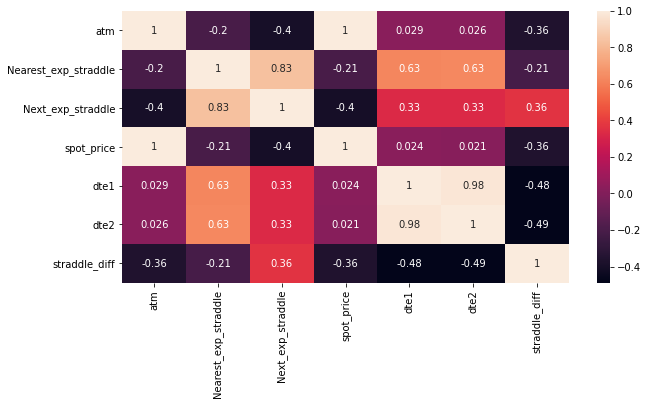

In [8]:
columns=['atm','Nearest_exp_straddle','Next_exp_straddle','spot_price','dte1','dte2','straddle_diff']
corr = df[columns].corr()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot = True)

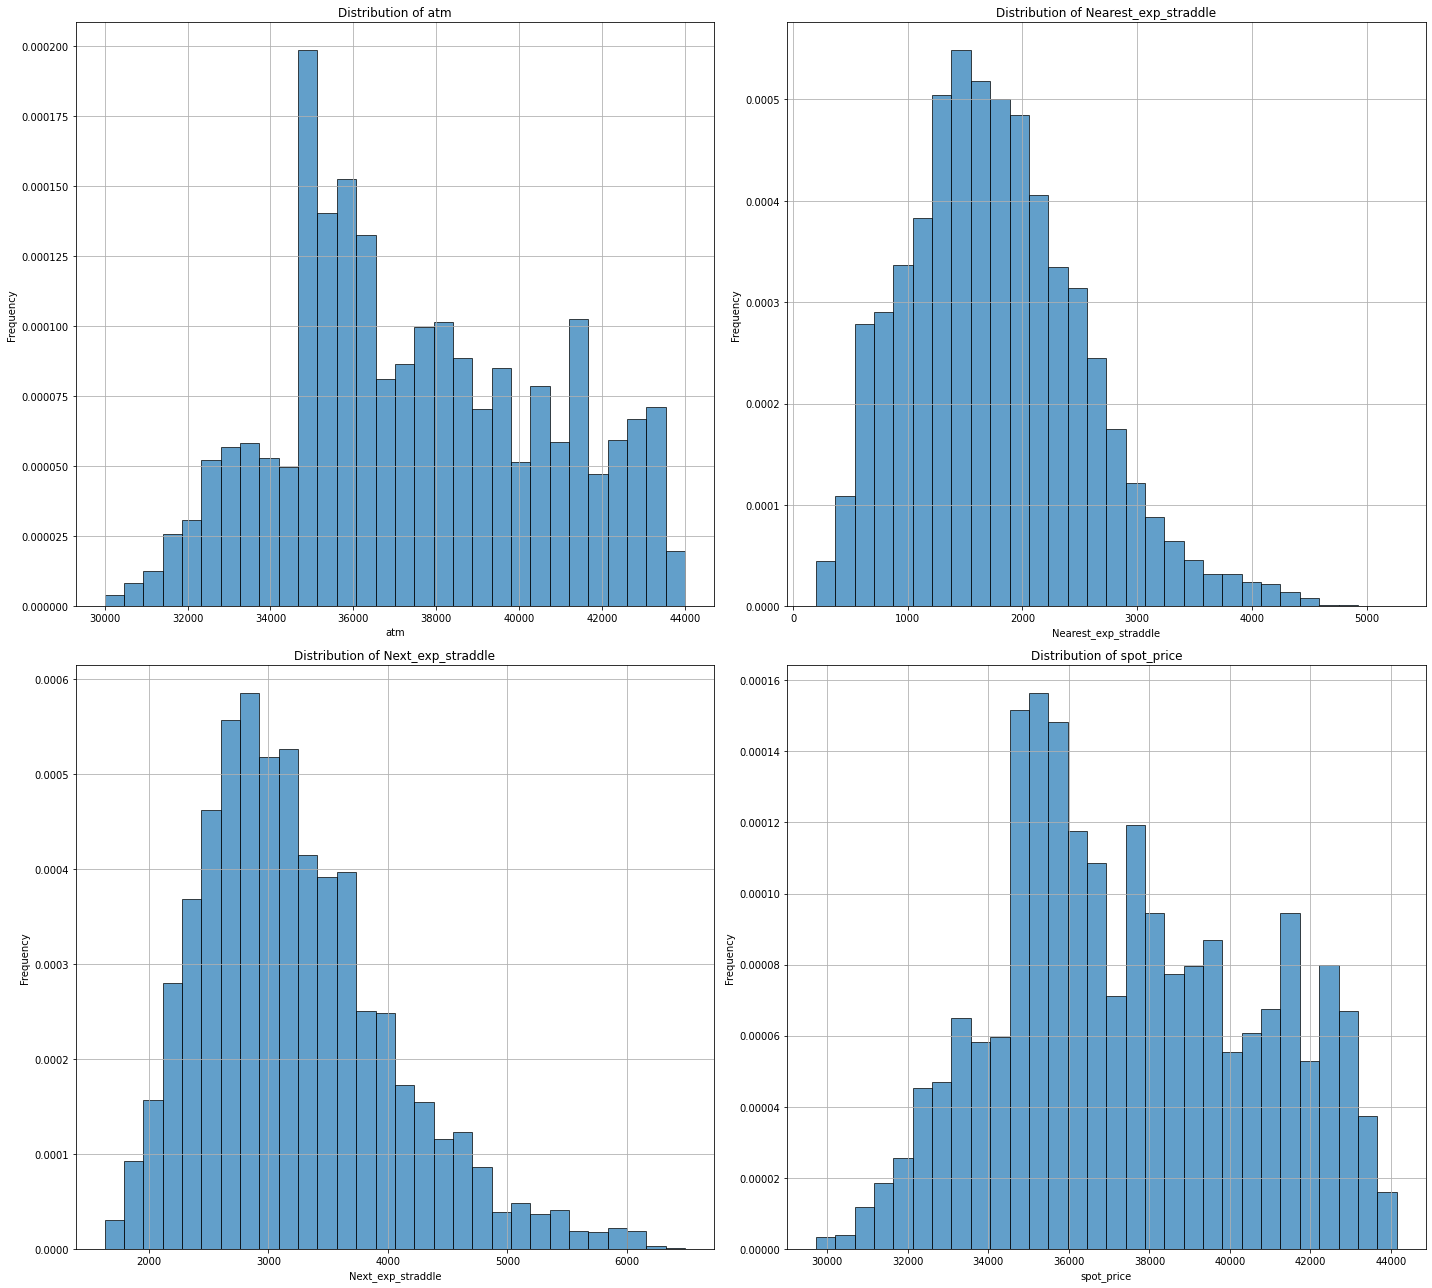

In [9]:
cols = ['atm', 'Nearest_exp_straddle','Next_exp_straddle','spot_price']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 18))

axes = axes.flatten()

for i, col in enumerate(cols):
    ax=axes[i]
    ax.hist(df[col], bins=30, density=True, edgecolor='black', alpha=0.7)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)
    
plt.tight_layout()

# Show the plot
plt.show()

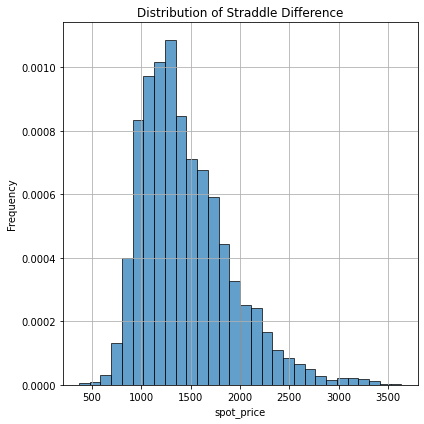

In [10]:
plt.figure(figsize=(6, 6))
plt.hist(df['straddle_diff'], bins=30, density=True, edgecolor='black', alpha=0.7)
plt.title(f'Distribution of Straddle Difference')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

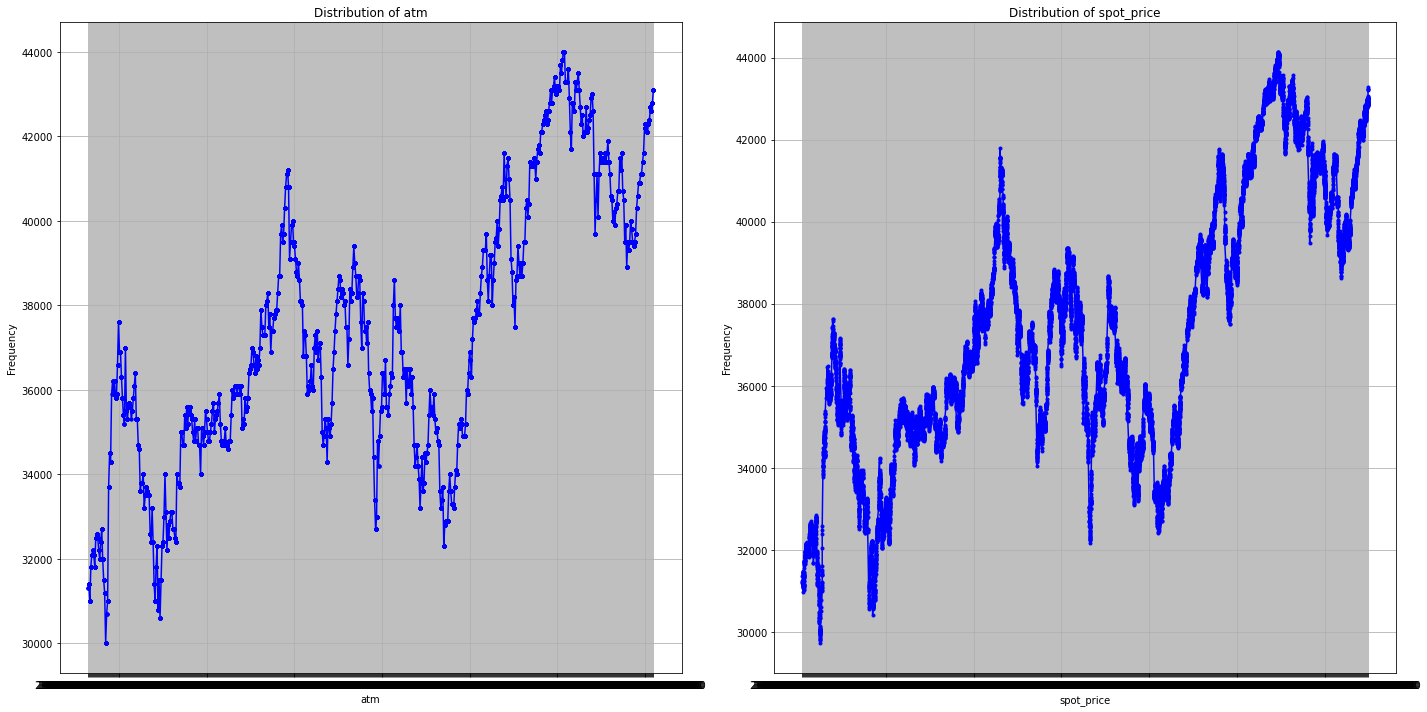

In [11]:
import matplotlib.pyplot as plt

cols_x = ['atm','spot_price']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

axes = axes.flatten()

for i, col in enumerate(cols_x):
    ax=axes[i]
    ax.plot(df['Date'].values, df[col].values, marker='.', linestyle='-', color='b')
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True)
    
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
df.head(3)

,Date,atm,Nearest_exp_straddle,Next_exp_straddle,spot_price,nearest_exp,second_exp,dte1,dte2,straddle_diff,Time,Datetime,weekday,Year,P_Nearest_Exp,P_Next_Exp,P_Straddle_Diff,PCNTChgStraddle
0,2021-01-01 00:00:00,31300,2328.20,3677.65,31350.15,2021-01-07 00:00:00,2021-01-14 00:00:00,6.00,13.00,1349.45,2024-03-01 09:55:00,2021-01-01 09:55:00,Friday,2021,7.438339,11.749681,4.311342,57.961086
1,2021-01-01 00:00:00,31300,2308.55,3605.00,31238.15,2021-01-07 00:00:00,2021-01-14 00:00:00,5.75,12.75,1296.45,2024-03-01 12:05:00,2021-01-01 12:05:00,Friday,2021,7.375559,11.517572,4.142013,56.158628
2,2021-01-01 00:00:00,31300,2191.35,3367.40,31224.70,2021-01-07 00:00:00,2021-01-14 00:00:00,5.50,12.50,1176.05,2024-03-01 15:25:00,2021-01-01 15:25:00,Friday,2021,7.001118,10.758466,3.757348,53.667830


## 1. Data Aggregation

In [16]:
df.columns

Index(['Date', 'atm', 'Nearest_exp_straddle', 'Next_exp_straddle',
       'spot_price', 'nearest_exp', 'second_exp', 'dte1', 'dte2',
       'straddle_diff', 'Time', 'Datetime', 'weekday', 'Year', 'P_Nearest_Exp',
       'P_Next_Exp', 'P_Straddle_Diff', 'PCNTChgStraddle'],
      dtype='object')

In [17]:
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import norm
import numpy as np

def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price
    
def objective_function(sigma, *args):
    observed_price, S, K, T, r = args
    return abs(black_scholes(S, K, T, r, sigma) - observed_price)

# Calculate implied volatility for each week
implied_volatilities_nearest = []
implied_volatilities_next = []

# Iterate through each week's data
for index, row in df.iterrows():
    # Extract relevant data for the week
    atm_price = row['atm']
    nearest_straddle_price = row['Nearest_exp_straddle']
    next_straddle_price = row['Next_exp_straddle']
    spot_price = row['spot_price']
    time_to_expiration_nearest = row['dte1']  # in days
    time_to_expiration_next = row['dte2']  # in days
    
    # Convert time to expiration to years
    T_nearest = time_to_expiration_nearest / 252
    T_next = time_to_expiration_next / 252
    
    # Assume a risk-free interest rate (r) for simplicity
    r = 0.065
    
    # Initial guess for implied volatility
    initial_guess = 0.2
    
    # Calculate implied volatility for nearest expiration straddle
    result_nearest = minimize(objective_function, x0=initial_guess, args=(nearest_straddle_price, spot_price, atm_price, T_nearest, r))
    implied_volatility_nearest = result_nearest.x[0]
    
    # Calculate implied volatility for next expiration straddle
    result_next = minimize(objective_function, x0=initial_guess, args=(next_straddle_price, spot_price, atm_price, T_next, r))
    implied_volatility_next = result_next.x[0]
    
    implied_volatilities_nearest.append(implied_volatility_nearest)
    implied_volatilities_next.append(implied_volatility_next)

# Add calculated implied volatilities to the aggregated DataFrame
df['implied_volatility_nearest'] = implied_volatilities_nearest
df['implied_volatility_next'] = implied_volatilities_next
df.head()

<ipython-input-17-c8b552b768b9>:7: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
<ipython-input-17-c8b552b768b9>:7: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
<ipython-input-17-c8b552b768b9>:7: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
<ipython-input-17-c8b552b768b9>:7: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
<ipython-input-17-c8b552b768b9>:7: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
<ipython-input-17-c8b552b768b9>:7: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
<ipython-input-17-c8b5

,Date,atm,Nearest_exp_straddle,Next_exp_straddle,spot_price,nearest_exp,second_exp,dte1,dte2,straddle_diff,Time,Datetime,weekday,Year,P_Nearest_Exp,P_Next_Exp,P_Straddle_Diff,PCNTChgStraddle,implied_volatility_nearest,implied_volatility_next
0,2021-01-01 00:00:00,31300,2328.20,3677.65,31350.15,2021-01-07 00:00:00,2021-01-14 00:00:00,6.00,13.00,1349.45,2024-03-01 09:55:00,2021-01-01 09:55:00,Friday,2021,7.438339,11.749681,4.311342,57.961086,1.184207,1.274765
1,2021-01-01 00:00:00,31300,2308.55,3605.00,31238.15,2021-01-07 00:00:00,2021-01-14 00:00:00,5.75,12.75,1296.45,2024-03-01 12:05:00,2021-01-01 12:05:00,Friday,2021,7.375559,11.517572,4.142013,56.158628,1.231911,1.284017
2,2021-01-01 00:00:00,31300,2191.35,3367.40,31224.70,2021-01-07 00:00:00,2021-01-14 00:00:00,5.50,12.50,1176.05,2024-03-01 15:25:00,2021-01-01 15:25:00,Friday,2021,7.001118,10.758466,3.757348,53.667830,1.200115,1.213338
3,2021-01-01 00:00:00,31300,2177.50,3470.55,31201.40,2021-01-07 00:00:00,2021-01-14 00:00:00,5.25,12.25,1293.05,2024-03-01 15:30:00,2021-01-01 15:30:00,Friday,2021,6.956869,11.088019,4.131150,59.382319,1.228067,1.268681
4,2021-01-04 00:00:00,31400,1896.05,3144.25,31393.85,2021-01-07 00:00:00,2021-01-14 00:00:00,3.00,10.00,1248.20,2024-03-01 09:25:00,2021-01-04 09:25:00,Monday,2021,6.038376,10.013535,3.975159,65.831597,1.382568,1.249938


In [20]:
df.to_csv('final.csv')